In [1]:
%run ../../../common_functions/import_all.py

from common_functions.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# A numerical estimation of pi with Monte Carlo

In [7]:
def f_quartercircle(x):
    """Quarter of a cirle in the first quadrant."""
    return np.sqrt(1-x**2)


# get 1000 numbers between 0 and 1, equally spaced, and the quarter circle function on them
x = np.linspace(0, 1, num=1000)
y = [f_quartercircle(item) for item in x]

# loop over the number of extracted points, and extract them uniformly between 0 and 1, both x and y
for n in [100, 1000, 5000, 10000, 20000, 30000, 50000]:
    
    points = np.random.uniform(0, 1, size=(n, 2))     # n points in the plane, randomly (uniformly) extracted in [0,1]
    
    under_points = []
    over_points = []
    
    # select if point is below or above the circle
    for point in points:
        if point[1] <= f_quartercircle(point[0]):
            under_points.append(point)
        else:
            over_points.append(point)

    # estimate pi as the ratio of number of points below circle to total
    est_pi = float(len(under_points)) / n * 4
    
    # compute the relative error to the real pi, in percentage
    perc_err = abs(float(est_pi - np.pi))/np.pi
    print('Estimated pi at %d points: %f, with relative error %f' %(n, est_pi, perc_err))

Estimated pi at 100 points: 3.120000, with relative error 0.006873
Estimated pi at 1000 points: 3.172000, with relative error 0.009679
Estimated pi at 5000 points: 3.164800, with relative error 0.007387
Estimated pi at 10000 points: 3.152000, with relative error 0.003313
Estimated pi at 20000 points: 3.136000, with relative error 0.001780
Estimated pi at 30000 points: 3.150400, with relative error 0.002803
Estimated pi at 50000 points: 3.144720, with relative error 0.000995


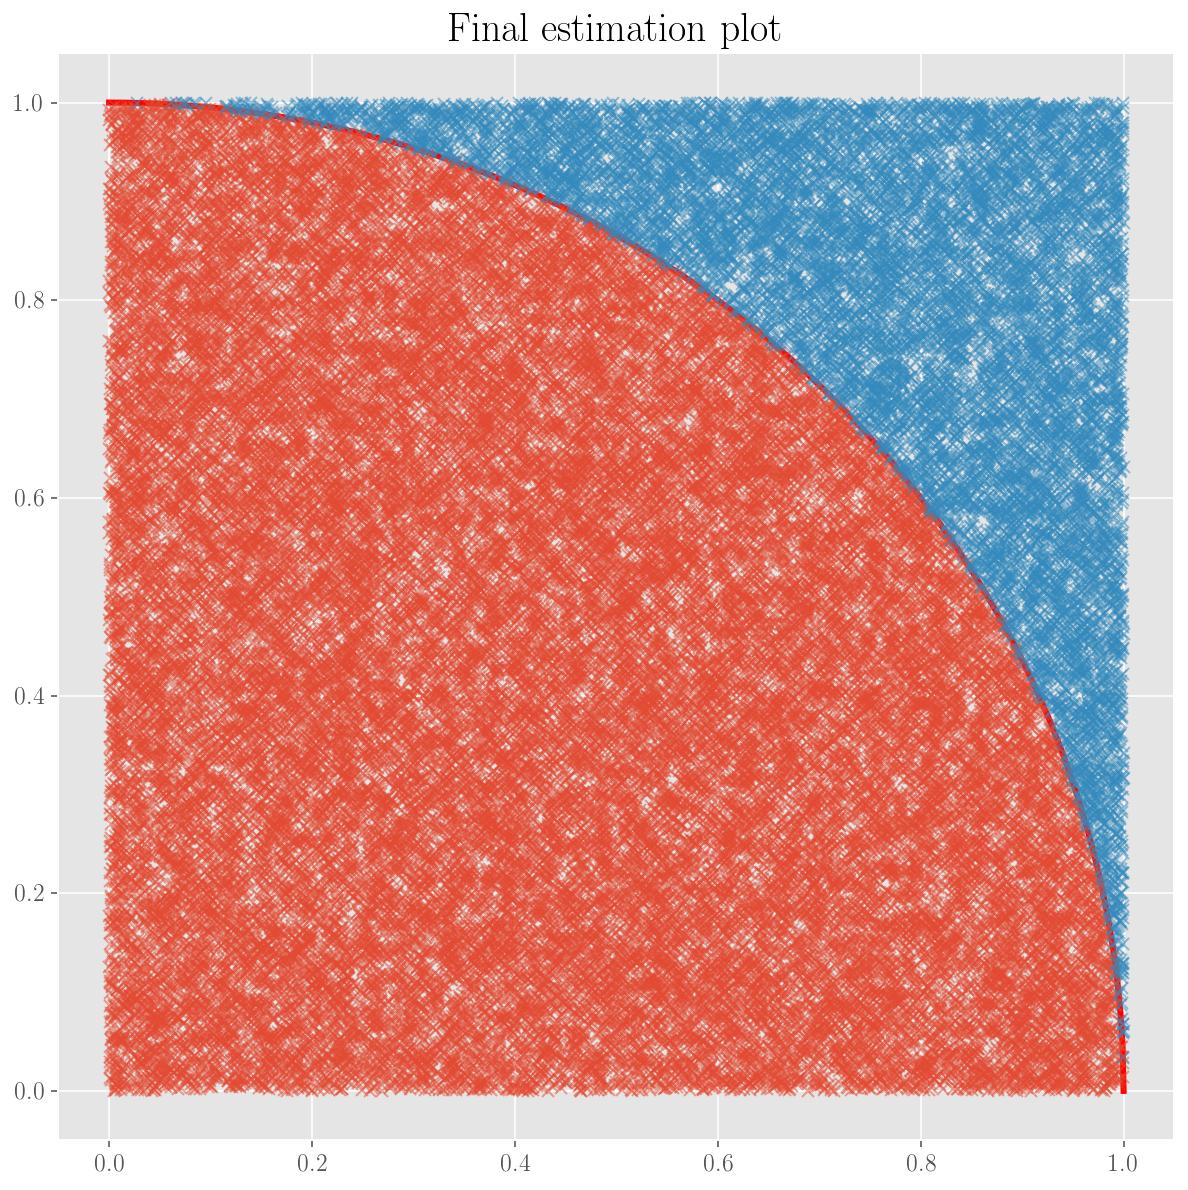

In [10]:
plt.figure(figsize=(10, 10))

plt.title('Final estimation plot')
plt.plot(x, y, color='r', lw=3)
plt.plot([point[0] for point in under_points], [point[1] for point in under_points], 'x', alpha=0.5)
plt.plot([point[0] for point in over_points], [point[1] for point in over_points], 'x', alpha=0.5)
plt.savefig('pi.png', dpi=200)
plt.show();